In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

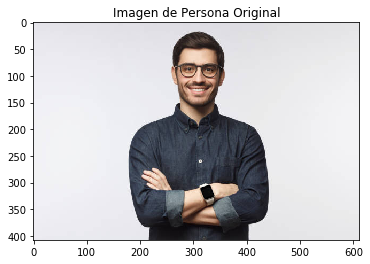

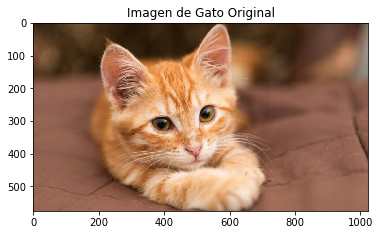

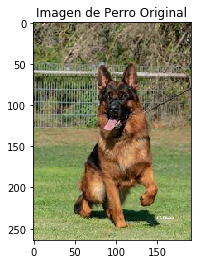

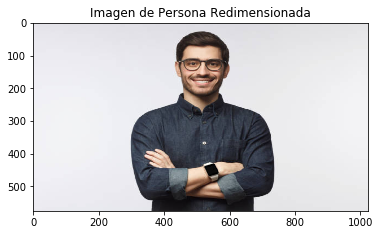

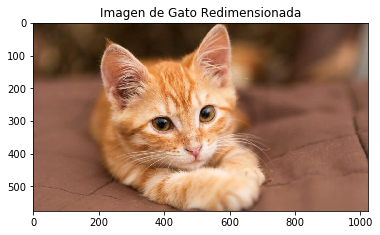

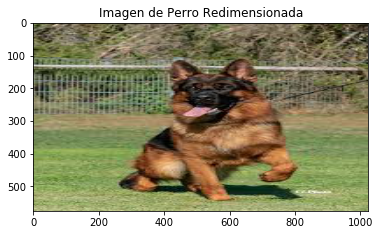

In [6]:
# Cargar las tres imágenes 
img_gato = cv2.imread('gato.jpg')
img_perro = cv2.imread('perro.jpg')
img_persona = cv2.imread('persona.jpg')
plt.imshow(cv2.cvtColor(img_persona, cv2.COLOR_BGR2RGB))
plt.title("Imagen de Persona Original")
plt.show()
plt.imshow(cv2.cvtColor(img_gato, cv2.COLOR_BGR2RGB))
plt.title("Imagen de Gato Original")
plt.show()
plt.imshow(cv2.cvtColor(img_perro, cv2.COLOR_BGR2RGB))
plt.title("Imagen de Perro Original")
plt.show()
# Obtener las dimensiones de cada imagen
h_gato, w_gato, _ = img_gato.shape
h_perro, w_perro, _ = img_perro.shape
h_persona, w_persona, _ = img_persona.shape

# Encontrar las dimensiones máximas
max_alto = max(h_gato, h_perro, h_persona)
max_ancho = max(w_gato, w_perro, w_persona)

# Redimensionar todas las imágenes al mismo tamaño 
gato_redimensionado = cv2.resize(img_gato, (max_ancho, max_alto))
perro_redimensionado = cv2.resize(img_perro, (max_ancho, max_alto))
persona_redimensionada = cv2.resize(img_persona, (max_ancho, max_alto))

# Mostrar una de las imágenes redimensionadas para comprobar
# Se convierte de BGR a RGB para mostrar con Matplotlib 
plt.imshow(cv2.cvtColor(persona_redimensionada, cv2.COLOR_BGR2RGB))
plt.title("Imagen de Persona Redimensionada")
plt.show()
plt.imshow(cv2.cvtColor(gato_redimensionado, cv2.COLOR_BGR2RGB))
plt.title("Imagen de Gato Redimensionada")
plt.show()
plt.imshow(cv2.cvtColor(perro_redimensionado, cv2.COLOR_BGR2RGB))
plt.title("Imagen de Perro Redimensionada")
plt.show()

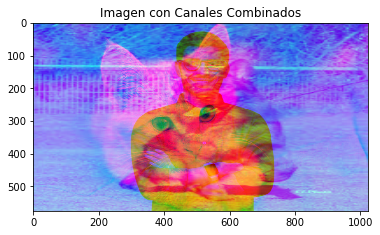

In [3]:
# OpenCV usa el orden BGR, por lo que el canal Rojo es el 2, Verde es 1 y Azul es 0.
# Extraer el canal Rojo del gato
canal_R_gato = gato_redimensionado[:,:,2]
# Extraer el canal Verde del perro
canal_G_perro = perro_redimensionado[:,:,1]
# Extraer el canal Azul de la persona
canal_B_persona = persona_redimensionada[:,:,0]

# Unir los canales en una nueva imagen BGR
imagen_combinada = cv2.merge([canal_B_persona, canal_G_perro, canal_R_gato])

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(imagen_combinada, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Canales Combinados")
plt.show()

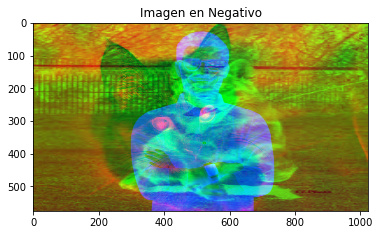

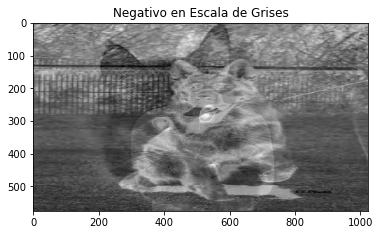

In [7]:
# Convertir la imagen combinada a su negativo
imagen_negativo = 255 - imagen_combinada

# Guardar la imagen en negativo 
cv2.imwrite('imagen_negativo.jpg', imagen_negativo)

# Mostrar el negativo
plt.imshow(cv2.cvtColor(imagen_negativo, cv2.COLOR_BGR2RGB))
plt.title("Imagen en Negativo")
plt.show()

# Abrir la imagen guardada en escala de grises 
img_negativo_gris = cv2.imread('imagen_negativo.jpg', cv2.IMREAD_GRAYSCALE)

# Guardar la nueva imagen en escala de grises
cv2.imwrite('imagen_negativo_gris.jpg', img_negativo_gris)

# Mostrar la imagen en escala de grises
plt.imshow(img_negativo_gris, cmap='gray')
plt.title("Negativo en Escala de Grises")
plt.show()

In [10]:
# Se usa la imagen del perro redimensionado
imagen_interactiva = perro_redimensionado.copy()
ventana_nombre = 'Visualizador de Canales (R, G, B para alternar, ESC para salir)'

# Banderas para controlar la visibilidad
mostrar_r, mostrar_g, mostrar_b = True, True, True

while True: # 
    img_display = imagen_interactiva.copy()

    # Poner a cero el canal si su bandera es falsa
    if not mostrar_b:
        img_display[:, :, 0] = 0
    if not mostrar_g:
        img_display[:, :, 1] = 0
    if not mostrar_r:
        img_display[:, :, 2] = 0

    # Mostrar la imagen en la ventana 
    cv2.imshow(ventana_nombre, img_display)

    # Esperar por la tecla del usuario 
    k = cv2.waitKey(1) & 0xFF

    # Salir si se presiona ESC 
    if k == 27:
        break
    elif k == ord('r'):
        mostrar_r = not mostrar_r
    elif k == ord('g'):
        mostrar_g = not mostrar_g
    elif k == ord('b'):
        mostrar_b = not mostrar_b

# Cerrar todas las ventanas 
cv2.destroyAllWindows()

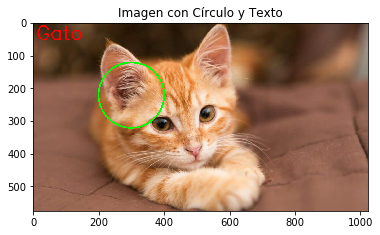

In [11]:
# Cargar la imagen y hacer una copia para dibujar sobre ella
img_dibujo = cv2.imread('gato.jpg').copy()

# Dibujar un círculo: (imagen, centro, radio, color BGR, grosor) 
cv2.circle(img_dibujo, center=(300, 220), radius=100, color=(0, 255, 0), thickness=3)

# Definir la fuente para el texto 
fuente = cv2.FONT_HERSHEY_SIMPLEX

# Escribir texto: (imagen, texto, posicion, fuente, tamaño, color, grosor) 
cv2.putText(img_dibujo, text='Gato', org=(10, 50), fontFace=fuente, fontScale=2, color=(0, 0, 255), thickness=3)

# Guardar la imagen modificada
cv2.imwrite('imagen_con_dibujo.jpg', img_dibujo)

# Mostrar el resultado
plt.imshow(cv2.cvtColor(img_dibujo, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Círculo y Texto")
plt.show()

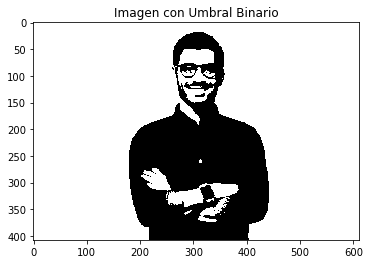

In [13]:
# Cargar la imagen de la persona
img_para_umbral = cv2.imread('persona.jpg')

# Convertir a escala de grises 
img_gris = cv2.cvtColor(img_para_umbral, cv2.COLOR_BGR2GRAY)

# Aplicar umbral binario. Devuelve el umbral y la imagen modificada.
# Píxeles < 127 se vuelven 0, y >= 127 se vuelven 255
_, imagen_umbral = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)

# Guardar la imagen con umbral
cv2.imwrite('imagen_umbral.jpg', imagen_umbral)

# Mostrar la imagen con umbral
plt.imshow(imagen_umbral, cmap='gray')
plt.title("Imagen con Umbral Binario")
plt.show()

Programa de Dibujo Interactivo Mejorado
---------------------------------------
Figuras: 'r' (rectángulo), 'c' (círculo), 'l' (línea), 'e' (elipse)
Texto: 't' (activa el modo texto, haz clic y escribe en la consola)
Opciones: 'u' (deshacer), 's' (guardar), 'q' (salir)
Modo actual: Círculo
Modo actual: Línea
Modo actual: Elipse
Modo actual: Línea
Modo actual: Rectángulo
Modo actual: Línea
Modo actual: Texto (haz clic en el lienzo y escribe en la consola)


Escribe el texto a insertar en la posición (457, 53):  Hola
Escribe el texto a insertar en la posición (498, 306):  Computacion Grafica


Última acción deshecha.
Última acción deshecha.
Última acción deshecha.
Última acción deshecha.
Última acción deshecha.
¡Dibujo guardado como 'mi_dibujo_mejorado.png'!
